In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

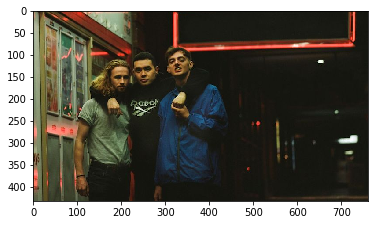

In [24]:
img = cv2.imread('group.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)


In [25]:
def singleScaleRetinex(img, sigma):
    retinexSSR = np.log(img) - np.log(cv2.GaussianBlur(img, (0,0), sigma))
    return retinexSSR

In [26]:
sigma_list = [15, 80, 250]
def multiScaleRetinex(img, sigma_list):
    retinexMSR = np.zeros_like(img)
    for sigma in sigma_list:
        np.add(retinexMSR, singleScaleRetinex(img, sigma), out = retinexMSR, casting = 'unsafe')
        
    retinexMSR = retinexMSR/len(sigma_list)
    return retinexMSR    

In [27]:
def MSRCR(img, sigma_list, G, b, a1, b1):
    # log(0) may occur so..
    img = np.float64(img) + 1.0
    
    # MSR
    img_msr = np.zeros_like(img)
    img_msr = multiScaleRetinex(img, sigma_list)
    
    # Color restoration step to find Ci(x,y)
    img_sum = np.sum(img, axis = 2, keepdims = True)
    color_restoration = b1 * (np.log10(a1 * img) - np.log10(img_sum))
    
    # Applying MSRCR
    r_msrcr = G * (color_restoration * img_msr + b)
    
    # Normalize
    for i in range(r_msrcr.shape[2]):
        r_msrcr[:, :, i] = (r_msrcr[:, :, i] - np.min(r_msrcr[:, :, i])) / (np.max(r_msrcr[:, :, i]) - np.min(r_msrcr[:, :, i])) * 255
        
    r_msrcr = np.uint8(np.minimum(np.maximum(r_msrcr, 0), 255))
    
    return r_msrcr

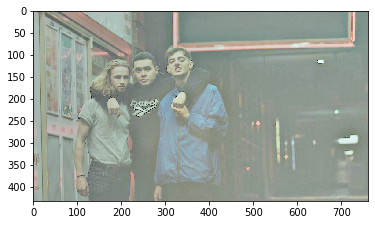

In [28]:
r_msrcr = MSRCR(img, sigma_list, 192, -30, 125, 46)
plt.imshow(r_msrcr)